# Smart Home Dataset with Weather Information

Data Cleaning and Data pre-processing  
Exploratory Data Analysis  
Training SimpleRNN model  
Time series Forecasting using LSTM

In [1]:
#importing requred libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import  LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
files=os.listdir()
csv_files = [file for file in files if file.endswith('.csv') ]
print(csv_files)

['HomeC.csv', 'modified.csv', 'predicted Energy_used.csv', 'Stroke.csv']


In [3]:
df=pd.read_csv("HomeC.csv",low_memory=False)

Data Cleaning and Pre-Processing

In [4]:
df.describe()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,5.039100e+05,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,1.451876e+09,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.454664e+05,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,1.451624e+09,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,1.451750e+09,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,1.451876e+09,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,1.452002e+09,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,1.452128e+09,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  int64  
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [6]:
df['datetime']=pd.to_datetime(df['datetime'])

In [7]:
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
datetime               0
dtype: int64

Making changes in column names

In [8]:
df.rename(columns=lambda x: x.replace(' [kW]',''),inplace=True)

In [9]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'datetime'],
      dtype='object')

Grouping the data into single column from same appliance/room for better analysis

In [10]:
#merging two columns of same kind for usability
df['Furnace']=df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen']=df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [11]:
df.drop(columns=['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], inplace=True)

In [12]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'datetime', 'Furnace', 'Kitchen'],
      dtype='object')

In [13]:
#Finding duplicate columns with different name and dropping them
duplicate_cols = list()
for i in range(df.shape[1]):
    col1 = df.iloc[:, i]
    for j in range(i + 1, df.shape[1]):
        col2 = df.iloc[:, j]
        if col1.equals(col2):
            print(df.columns.values[i]+ " and "+ df.columns.values[j]+" are same")
            duplicate_cols.append(df.columns.values[j])

use and House overall are same
gen and Solar are same


In [14]:
df.drop(duplicate_cols, axis=1,inplace=True)

Dealing with columns which are of type object and converting them to numerical values

In [15]:
df.tail()

,time,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,datetime,Furnace,Kitchen
503905,1452128305,1.601233,0.003183,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,...,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,2016-12-16 03:25:00,0.727683,0.000633
503906,1452128306,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,...,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,2016-12-16 03:26:00,0.729050,0.000600
503907,1452128307,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,...,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,2016-12-16 03:27:00,1.060117,0.000600
503908,1452128308,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,...,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,2016-12-16 03:28:00,1.116033,0.000650
503909,1452128309,1.990950,0.003233,0.000050,0.042100,0.004917,0.008133,0.012833,0.032167,0.000950,...,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,2016-12-16 03:29:00,1.128833,0.000650


In [16]:
#converting unix to datetime format and setting a datatime index
start_time= pd.to_datetime(df['time'], unit='s')
print(start_time)

0        2016-01-01 05:00:00
1        2016-01-01 05:00:01
2        2016-01-01 05:00:02
3        2016-01-01 05:00:03
4        2016-01-01 05:00:04
                 ...        
503905   2016-01-07 00:58:25
503906   2016-01-07 00:58:26
503907   2016-01-07 00:58:27
503908   2016-01-07 00:58:28
503909   2016-01-07 00:58:29
Name: time, Length: 503910, dtype: datetime64[ns]


In [17]:
time_index = pd.date_range(start_time[0], periods=len(df),  freq='min')  
datetime_index = pd.DatetimeIndex(time_index)
df = df.set_index(datetime_index)

In [18]:
df.dtypes

time                            int64
use                           float64
gen                           float64
Dishwasher                    float64
Home office                   float64
Fridge                        float64
Wine cellar                   float64
Garage door                   float64
Barn                          float64
Well                          float64
Microwave                     float64
Living room                   float64
temperature                   float64
icon                           object
humidity                      float64
visibility                    float64
summary                        object
apparentTemperature           float64
pressure                      float64
windSpeed                     float64
cloudCover                     object
windBearing                   float64
precipIntensity               float64
dewPoint                      float64
precipProbability             float64
datetime               datetime64[ns]
Furnace     

In [19]:
df.rename(columns={'icon': 'climate_condition', 'use': 'Energy_used','gen':'Energy_generated'}, inplace=True)

In [20]:
#Encoding categorical data into numeric data
enc=LabelEncoder()
climate_condition=enc.fit_transform(df['climate_condition'])
df['climate_condition']=climate_condition

In [21]:
df.drop('summary', axis=1,inplace=True)

In [22]:
df['cloudCover']

2016-01-01 05:00:00    cloudCover
2016-01-01 05:01:00    cloudCover
2016-01-01 05:02:00    cloudCover
2016-01-01 05:03:00    cloudCover
2016-01-01 05:04:00    cloudCover
                          ...    
2016-12-16 03:25:00          0.31
2016-12-16 03:26:00          0.31
2016-12-16 03:27:00          0.31
2016-12-16 03:28:00          0.31
2016-12-16 03:29:00          0.31
Freq: T, Name: cloudCover, Length: 503910, dtype: object

In [23]:
df[df['cloudCover']=='cloudCover'].index

DatetimeIndex(['2016-01-01 05:00:00', '2016-01-01 05:01:00',
               '2016-01-01 05:02:00', '2016-01-01 05:03:00',
               '2016-01-01 05:04:00', '2016-01-01 05:05:00',
               '2016-01-01 05:06:00', '2016-01-01 05:07:00',
               '2016-01-01 05:08:00', '2016-01-01 05:09:00',
               '2016-01-01 05:10:00', '2016-01-01 05:11:00',
               '2016-01-01 05:12:00', '2016-01-01 05:13:00',
               '2016-01-01 05:14:00', '2016-01-01 05:15:00',
               '2016-01-01 05:16:00', '2016-01-01 05:17:00',
               '2016-01-01 05:18:00', '2016-01-01 05:19:00',
               '2016-01-01 05:20:00', '2016-01-01 05:21:00',
               '2016-01-01 05:22:00', '2016-01-01 05:23:00',
               '2016-01-01 05:24:00', '2016-01-01 05:25:00',
               '2016-01-01 05:26:00', '2016-01-01 05:27:00',
               '2016-01-01 05:28:00', '2016-01-01 05:29:00',
               '2016-01-01 05:30:00', '2016-01-01 05:31:00',
               '2016-01-

We see that for first 58 minutes the values for cloudCover are not numerical,so converting them to numerical by replacing them with average value

In [24]:
df['cloudCover'].replace('cloudCover', np.nan, inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].fillna(value=df['cloudCover'].mean(), inplace=True)

In [25]:
df['cloudCover']

2016-01-01 05:00:00    0.225885
2016-01-01 05:01:00    0.225885
2016-01-01 05:02:00    0.225885
2016-01-01 05:03:00    0.225885
2016-01-01 05:04:00    0.225885
                         ...   
2016-12-16 03:25:00    0.310000
2016-12-16 03:26:00    0.310000
2016-12-16 03:27:00    0.310000
2016-12-16 03:28:00    0.310000
2016-12-16 03:29:00    0.310000
Freq: T, Name: cloudCover, Length: 503910, dtype: float64

In [26]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df['time'] = (df['time'] - datetime.datetime(1970,1,1)).dt.total_seconds()
df['datetime']

2016-01-01 05:00:00   2016-01-01 05:00:00
2016-01-01 05:01:00   2016-01-01 05:01:00
2016-01-01 05:02:00   2016-01-01 05:02:00
2016-01-01 05:03:00   2016-01-01 05:03:00
2016-01-01 05:04:00   2016-01-01 05:04:00
                              ...        
2016-12-16 03:25:00   2016-12-16 03:25:00
2016-12-16 03:26:00   2016-12-16 03:26:00
2016-12-16 03:27:00   2016-12-16 03:27:00
2016-12-16 03:28:00   2016-12-16 03:28:00
2016-12-16 03:29:00   2016-12-16 03:29:00
Freq: T, Name: datetime, Length: 503910, dtype: datetime64[ns]

Text(0.5, 1.0, 'Correlation of All data')

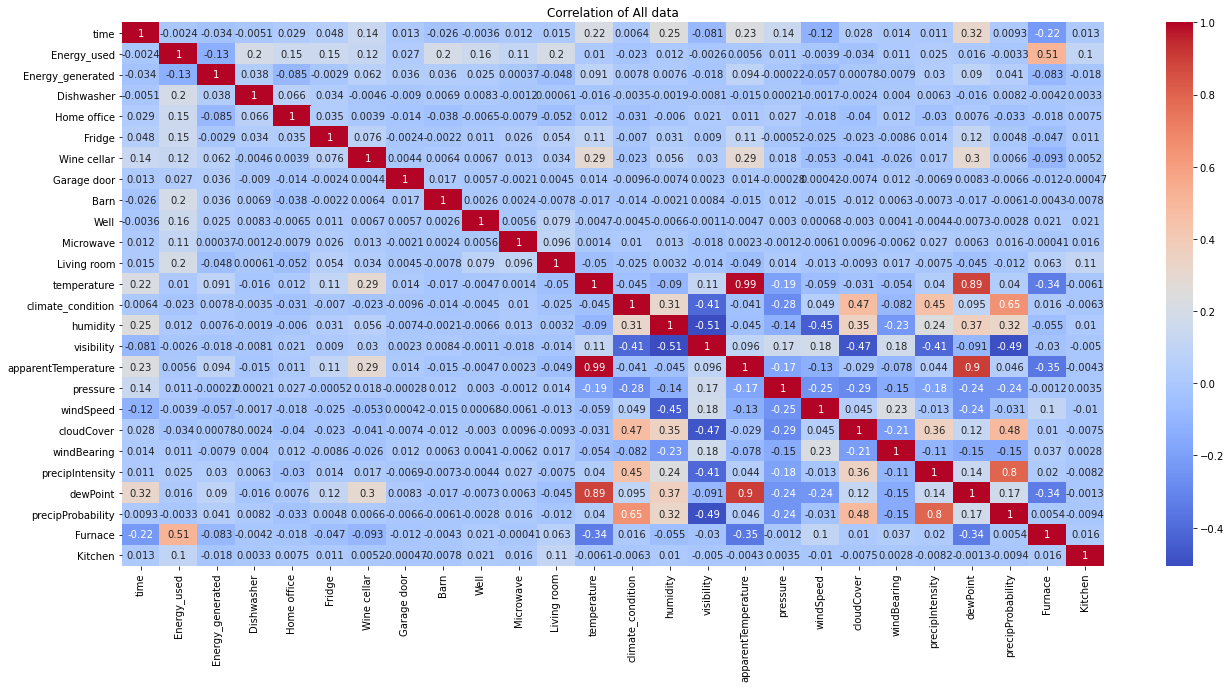

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
ax.set_title('Correlation of All data')

->There is a strong correlation identified between temperature and apparentTemperature(0.99), temperature and dewPoint(0.89), 
apparentTemperature and dewPoint(0.9),climate_condition and percipProbability(0.65)   
->There is partial correlation identified between cloudCover and percipProbability(0.48), climate_condition and cloudCover(0.47), climate_condition and precipIntensity
(0.45), dewPoint and humidity(0.37), cloudCover and percipIntensity(0.36).    
->There some weak correlations between other attributes and there is no correlation found between appliances and rooms of home. 

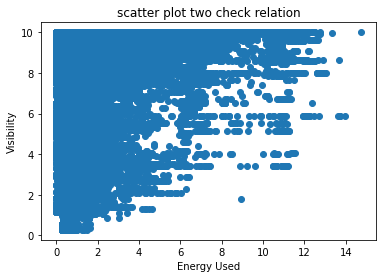

In [28]:
# plotting a scatter plot between energy generated and temperature
plt.scatter(data=df,x='Energy_used',y='visibility')
plt.xlabel('Energy Used')
plt.ylabel('Visibility')
plt.title('scatter plot two check relation')
plt.show()


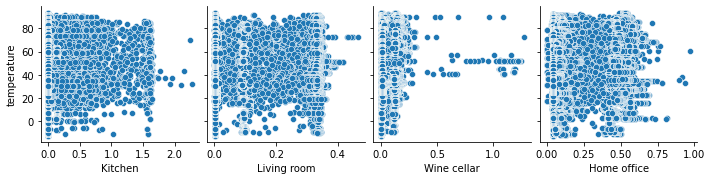

In [29]:
#to check how energy consumption of rooms vary with temperature
sns.pairplot(data=df, x_vars=['Kitchen','Living room','Wine cellar','Home office'],y_vars=['temperature'])
plt.show()

In [30]:
df1=df.drop(['datetime'],axis=1)
from scipy import stats

# Detecting outliers using Z-score method
z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df1[filtered_entries]

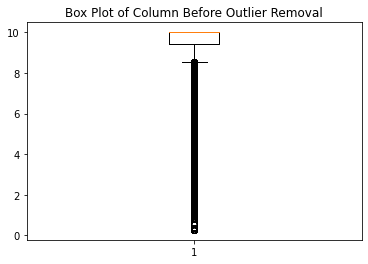

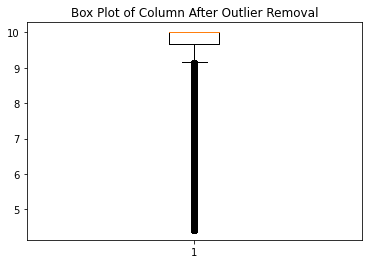

In [31]:
# box plot before outlier removal
plt.boxplot(df['visibility'])
plt.title('Box Plot of Column Before Outlier Removal')
plt.show()

# box plot after outlier removal
plt.boxplot(df_no_outliers['visibility'])
plt.title('Box Plot of Column After Outlier Removal')
plt.show()

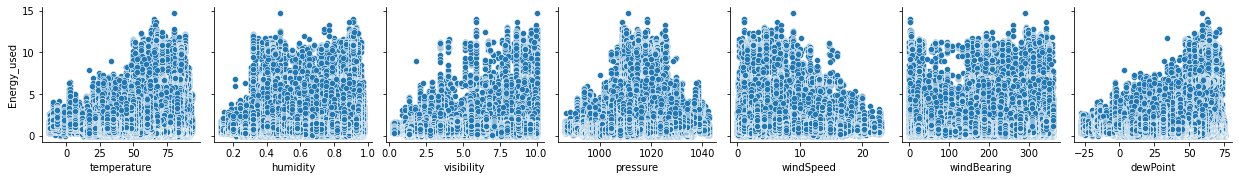

In [32]:
# Pairplot of Energy Used and Weather Features
sns.pairplot(df, x_vars=['temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'windBearing', 'dewPoint'], 
                 y_vars=['Energy_used'])

C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


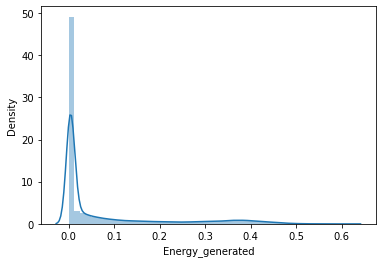

In [33]:
#distribution plot of energy generated
sns.distplot(df['Energy_generated'])
plt.show()

Training model using SimpleRNN

Epoch 1/10
11024/11024 [==============================] - 46s 4ms/step - loss: 33059.1797
Epoch 2/10
11024/11024 [==============================] - 44s 4ms/step - loss: 23.1521
Epoch 3/10
11024/11024 [==============================] - 44s 4ms/step - loss: 1.1189
Epoch 4/10
11024/11024 [==============================] - 44s 4ms/step - loss: 0.5211
Epoch 5/10
11024/11024 [==============================] - 44s 4ms/step - loss: 0.4140
Epoch 6/10
11024/11024 [==============================] - 44s 4ms/step - loss: 0.4045
Epoch 7/10
11024/11024 [==============================] - 44s 4ms/step - loss: 0.4021
Epoch 8/10
11024/11024 [==============================] - 45s 4ms/step - loss: 0.4030
Epoch 9/10
11024/11024 [==============================] - 44s 4ms/step - loss: 0.3954
Epoch 10/10
4725/4725 [==============================] - 8s 2ms/step


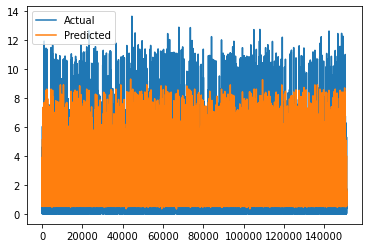

In [34]:
# Define the input and output variables
X = df.drop(['Energy_used','datetime'],axis=1).values
y = df['Energy_used'].values
X=X.astype(float)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape input data for RNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predicting energy consumption using the trained model
y_pred = model.predict(X_test)

# Ploting the actual and predicted values
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [35]:
#adding the predicted values to csv file
predicted=pd.DataFrame(y_pred,columns=['predicted Energy_use'],index=df.index[-len(y_pred):])
predicted=pd.concat([df,predicted],axis=1)
predicted.to_csv('Predicted_Energy.csv',index=False)

Time series forecasting using LSTM

Epoch 1/10
174/174 - 12s - loss: 0.0050 - 12s/epoch - 72ms/step
Epoch 2/10
174/174 - 12s - loss: 0.0032 - 12s/epoch - 67ms/step
Epoch 3/10
174/174 - 11s - loss: 0.0024 - 11s/epoch - 65ms/step
Epoch 4/10
174/174 - 12s - loss: 0.0020 - 12s/epoch - 70ms/step
Epoch 5/10
174/174 - 11s - loss: 0.0019 - 11s/epoch - 65ms/step
Epoch 6/10
174/174 - 11s - loss: 0.0019 - 11s/epoch - 65ms/step
Epoch 7/10
174/174 - 11s - loss: 0.0019 - 11s/epoch - 64ms/step
Epoch 8/10
174/174 - 11s - loss: 0.0018 - 11s/epoch - 66ms/step
Epoch 9/10
174/174 - 12s - loss: 0.0019 - 12s/epoch - 67ms/step
Epoch 10/10
174/174 - 11s - loss: 0.0018 - 11s/epoch - 65ms/step
Time taken to train the model in seconds=  115.86647653579712
231/231 [==============================] - 4s 16ms/step
Train Score: 0.098 MSE
Test Score: 0.072 MSE


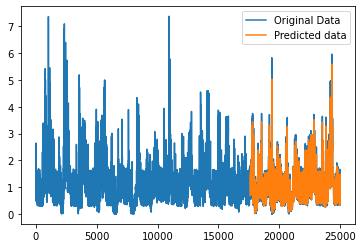

In [36]:
# Set seed for reproducibility
np.random.seed(42)

# Prepare data
X = df['Energy_used'].values[:25000]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, 1))
train_size = int(len(X) * 0.70)
train, test = X[0:train_size,:], X[train_size:len(X),:]

# Convert to sequences
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 120
trainX, trainY = create_sequences(train, look_back)
testX, testY = create_sequences(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
start_time= time.time()
model.fit(trainX, trainY, epochs=10, batch_size=100, verbose=2)
end_time= time.time()
time_taken= end_time-start_time
print('Time taken to train the model in seconds= ',time_taken)

# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate MSE
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.3f MSE' % trainScore)
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.3f MSE' % testScore)

# Plotting predictions
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(X), :] = testPredict
plt.plot(scaler.inverse_transform(X), label='Original Data')
plt.plot(testPredictPlot, label='Predicted data')
plt.legend()
plt.show()


In [37]:
#checking mae 
mae = mean_absolute_error(testY[0], testPredict[:,0])
print("MAE:", mae)


MAE: 0.14915241404479426
